In [1]:
from _TES import TES
from _QET import QET
from _absorber import Absorber
from _detector import Detector


import numpy as np


In [2]:
l = 140e-6 #2.5e-05*10
w = 2.5e-06
l_overlap = 20e-6
n_fins = 6
sigma = 220000000.0
t0 = 40e-3
res_n = 0.23999999999999996
res_n = 1
0.45
con_type= 'ellipse'
#con_type= 'modern'
l_f = 150e-6 * 0.9#0.00030500000000000015
h_fin = 600e-6# 9e-07
ahole = 4.9e-11


absorber = Absorber("Si", "square", 1e-3, 1e-2, 3e-3)
#absorber.print()

In [3]:
tes = TES(length=l,
       width=w, 
       l_overlap = l_overlap,
       n_fin=n_fins,
       sigma=sigma,
       rn=res_n,
       rsh = 5e-3,
       rp = 6e-3,   

   
   L_tot= 5e-08,)
#tes.print()
qet = QET(l_fin=l_f, h_fin=h_fin, TES=tes, ahole=ahole, type_qp_eff=2)
#qet.print()

In [4]:
det = Detector('farts', absorber, qet)
#det.print()

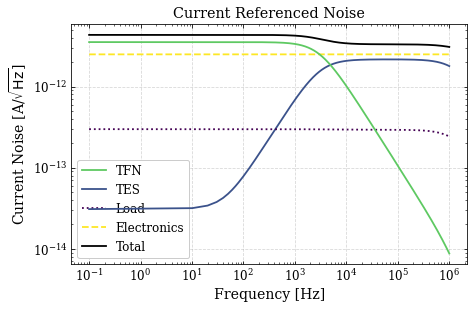

In [ ]:
det.calc_res()
det.plot_si()
det.plot_sp()

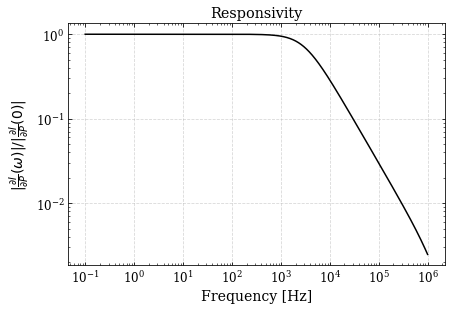

In [6]:
det.plot_responsivity()